In [1]:
#Importing the required libraries and loading the data.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Ratings_df=pd.read_excel("Ratings.xlsx")
Books_df=pd.read_excel("Books.xlsx")
Users_df=pd.read_excel("Users.xlsx")

In [43]:
# Getting info on each dataset after loading
Ratings_df.info()
Users_df.info()
Books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1048575 non-null  int64  
 1   ISBN         1048575 non-null  object 
 2   Book-Rating  1048568 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  float64
 1   Location  278859 non-null  object 
 2   Age       168012 non-null  float64
 3   Column1   37 non-null      object 
dtypes: float64(2), object(2)
memory usage: 8.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------  

In [44]:
# Shape of the dataframes
print("Ratings shape:", Ratings_df.shape)
print("Users shape:", Users_df.shape)
print("Books shape:", Books_df.shape)

Ratings shape: (1048575, 3)
Users shape: (278859, 4)
Books shape: (271360, 8)


In [45]:
# Looking for missing values
print("\nMissing Values in Books:\n", Books_df.isnull().sum())
print("\nMissing Values in Ratings:\n", Ratings_df.isnull().sum())
print("\nMissing Values in Users:\n", Users_df.isnull().sum())


Missing Values in Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    3
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Missing Values in Ratings:
 User-ID        0
ISBN           0
Book-Rating    7
dtype: int64

Missing Values in Users:
 User-ID          1
Location         0
Age         110847
Column1     278822
dtype: int64


In [46]:
# Look for duplicates and Drop if necessary
print("Duplicate Books:", Books_df.duplicated().sum())
print("Duplicate Ratings:", Ratings_df.duplicated().sum())
print("Duplicate Users:", Users_df.duplicated().sum())


Books_df.drop_duplicates(inplace=True)
Ratings_df.drop_duplicates(inplace=True)
Users_df.drop_duplicates(inplace=True)

Duplicate Books: 0
Duplicate Ratings: 0
Duplicate Users: 0


In [47]:
#Descriptive Statistics for each dataset
print(Books_df.describe(include='all'))
print(Ratings_df.describe(include='all'))
print(Users_df.describe(include='all'))

              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358        271357.000000   
unique      271360          242135           102022                  NaN   
top     0195153448  Selected Poems  Agatha Christie                  NaN   
freq             1              27              632                  NaN   
mean           NaN             NaN              NaN          1959.760817   
std            NaN             NaN              NaN           257.994226   
min            NaN             NaN              NaN             0.000000   
25%            NaN             NaN              NaN          1989.000000   
50%            NaN             NaN              NaN          1995.000000   
75%            NaN             NaN              NaN          2000.000000   
max            NaN             NaN              NaN          2050.000000   

        Publisher                                        Image-URL-S  \
count      2713

# Books Dataset


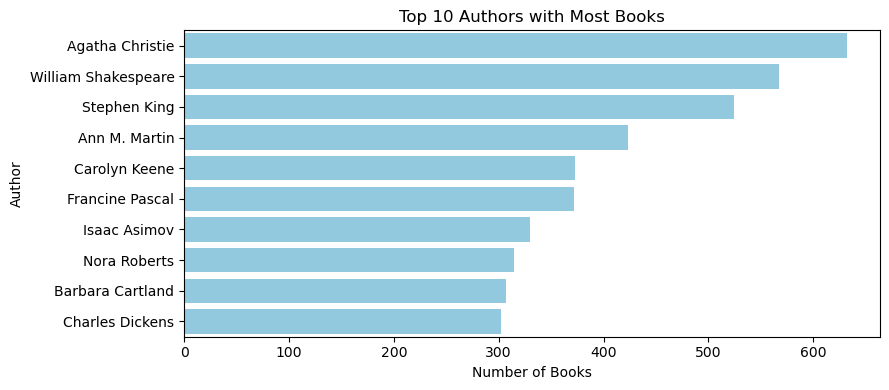

In [48]:
top_authors = Books_df['Book-Author'].value_counts().head(10)

plt.figure(figsize=(9,4))
sns.barplot(x=top_authors.values, y=top_authors.index, color="skyblue")
plt.title("Top 10 Authors with Most Books")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.tight_layout()
plt.show()


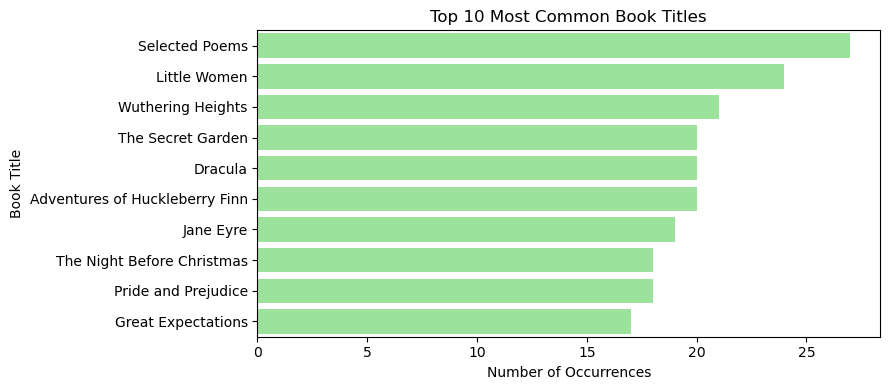

In [49]:
top_books = Books_df['Book-Title'].value_counts().head(10)

plt.figure(figsize=(9,4))
sns.barplot(x=top_books.values, y=top_books.index, color="lightgreen")
plt.title("Top 10 Most Common Book Titles")
plt.xlabel("Number of Occurrences")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()


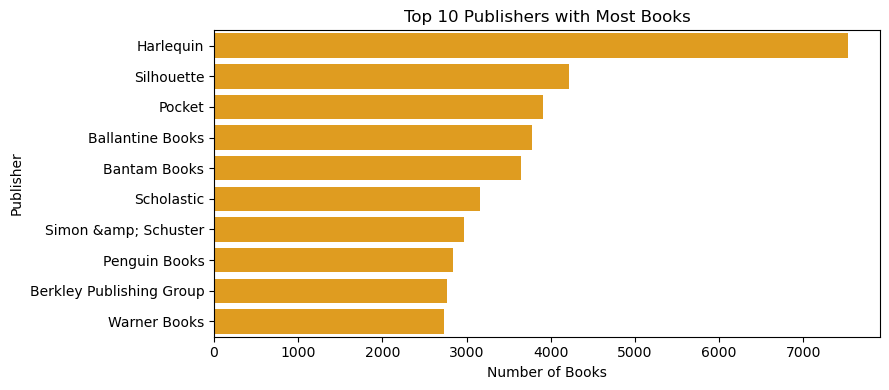

In [50]:
top_publishers = Books_df['Publisher'].value_counts().head(10)

plt.figure(figsize=(9,4))
sns.barplot(x=top_publishers.values, y=top_publishers.index, color="orange")
plt.title("Top 10 Publishers with Most Books")
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()


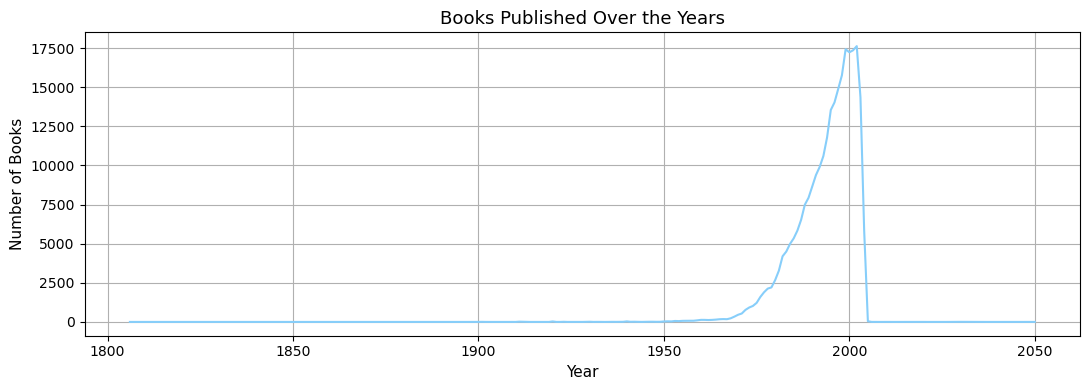

In [51]:
# Filter for years
valid_years = Books_df[Books_df["Year-Of-Publication"] > 1400]

books_per_year = valid_years["Year-Of-Publication"].value_counts().sort_index()


plt.figure(figsize=(11,4))
sns.lineplot(x=books_per_year.index, y=books_per_year.values, color="#87CEFA")
plt.title("Books Published Over the Years", fontsize=13)
plt.xlabel("Year", fontsize=11)
plt.ylabel("Number of Books", fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()


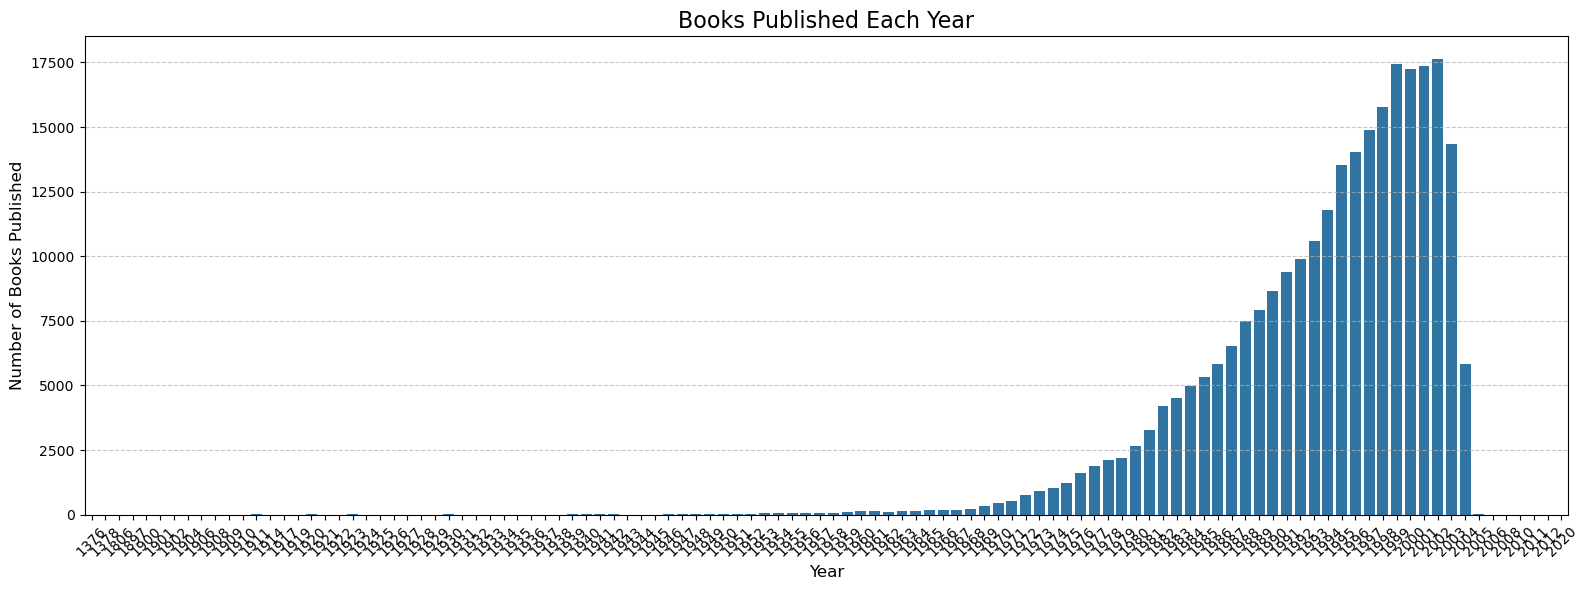

In [52]:
books_filtered = Books_df[(Books_df["Year-Of-Publication"] >= 1000) & 
                          (Books_df["Year-Of-Publication"] <= 2020)]

books_per_year = books_filtered["Year-Of-Publication"].value_counts().sort_index()

plt.figure(figsize=(16,6))
sns.barplot(x=books_per_year.index.astype(int), y=books_per_year.values)
plt.title("Books Published Each Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Books Published", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# Users Dataset

In [53]:
# Fillling null values in the age colunm with the median
Users_df['Age'].fillna(Users_df['Age'].median(), inplace=True)
# Filtering out outliers in age (e.g., ages > 100 or < 5)
Users_df = Users_df[(Users_df['Age'] >= 5) & (Users_df['Age'] <= 100)]



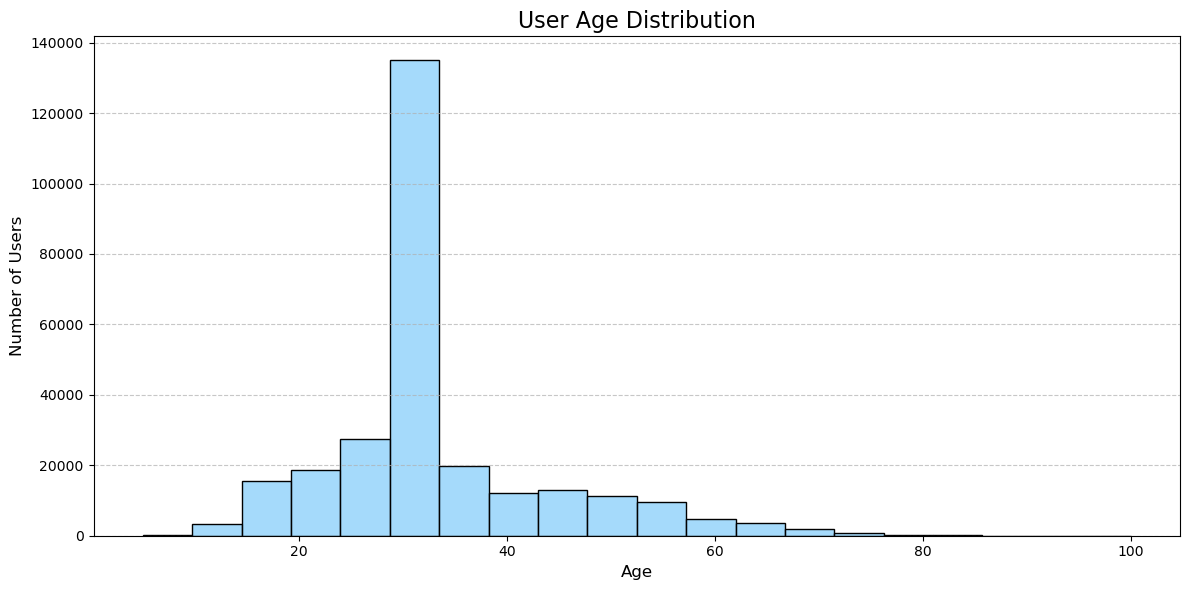

In [54]:
# Filter valid ages
valid_users = Users_df[(Users_df['Age'] >= 5) & (Users_df['Age'] <= 100)]

# Age distribution
plt.figure(figsize=(12,6))
sns.histplot(valid_users['Age'], bins=20, kde=False, color="#87CEFA", edgecolor='black')
plt.title("User Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [55]:
# Spliting the Location column into seperate columns
location_split = Users_df['Location'].str.split(',', expand=True)

# Create new columns
Users_df['City'] = location_split[0].str.strip()
Users_df['State'] = location_split[1].str.strip() if location_split.shape[1] > 1 else None
Users_df['Country'] = location_split[2].str.strip() if location_split.shape[1] > 2 else None

# Preview
Users_df[['Location', 'City', 'State', 'Country']].head()


,Location,City,State,Country
0,"nyc, new york, usa",nyc,new york,usa
1,"stockton, california, usa",stockton,california,usa
2,"moscow, yukon territory, russia",moscow,yukon territory,russia
3,"porto, v.n.gaia, portugal",porto,v.n.gaia,portugal
4,"farnborough, hants, united kingdom",farnborough,hants,united kingdom


In [56]:
Users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277612 entries, 0 to 278858
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   277611 non-null  float64
 1   Location  277612 non-null  object 
 2   Age       277612 non-null  float64
 3   Column1   37 non-null      object 
 4   City      277612 non-null  object 
 5   State     277339 non-null  object 
 6   Country   274450 non-null  object 
dtypes: float64(2), object(5)
memory usage: 16.9+ MB


In [57]:
Users_df.shape

(277612, 7)

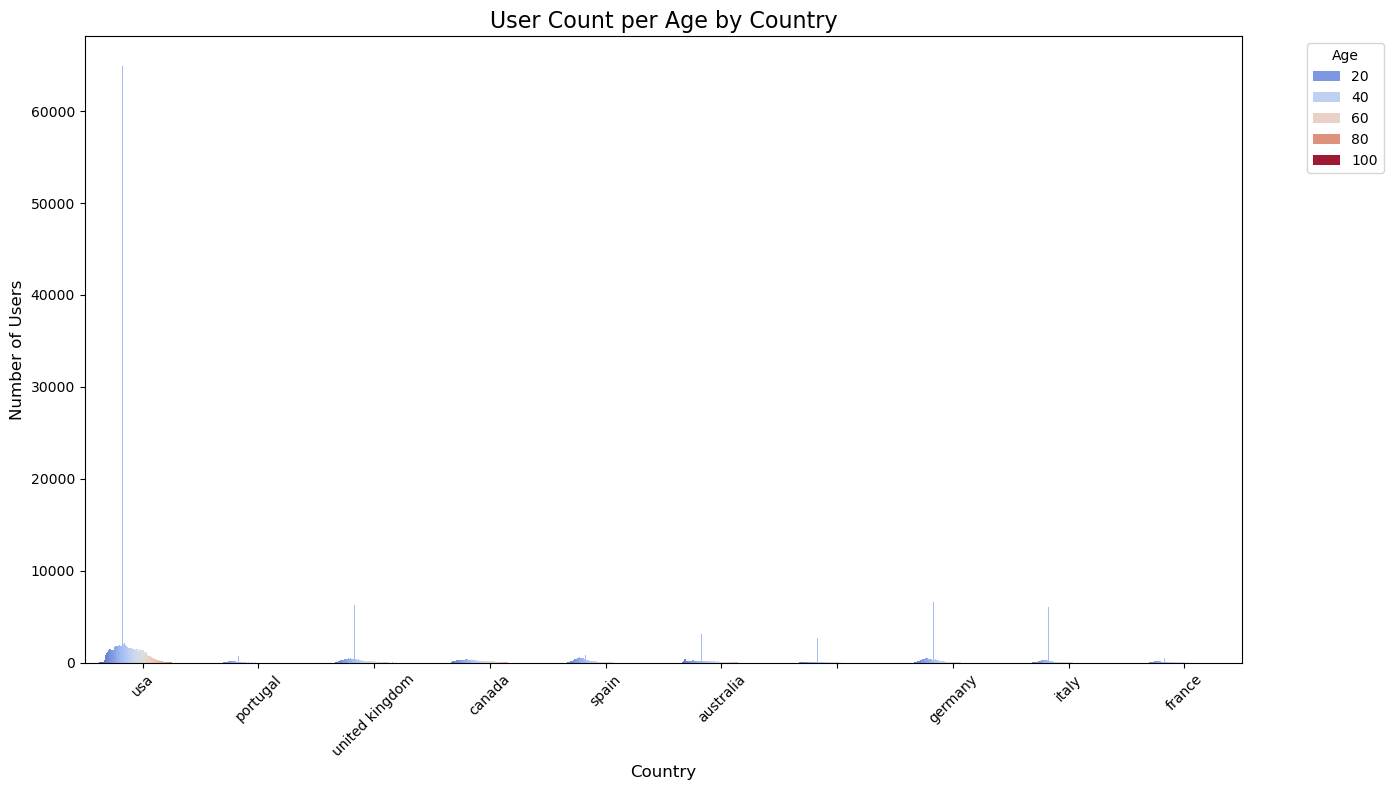

In [58]:
#Adding age filter
valid_users = Users_df[(Users_df['Age'] >= 5) & (Users_df['Age'] <= 100)]

# After splitting the Location, drop any null values in country
valid_users = valid_users.dropna(subset=['Country'])

# Get top 10 countries by number of users
top_countries = valid_users['Country'].value_counts().head(10).index
filtered_users = valid_users[valid_users['Country'].isin(top_countries)]

# Plot count of users per age for each country
plt.figure(figsize=(14,8))
sns.countplot(data=filtered_users, x='Country', hue='Age', palette='coolwarm')
plt.title("User Count per Age by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Ratings Dataset

In [59]:
#Rating in values for each rating

# Drop missing values
Ratings_df = Ratings_df.dropna(subset=['Book-Rating'])

# Round ratings to nearest 0.5
Ratings_df['Count for each rating'] = (Ratings_df['Book-Rating'] * 2).round() / 2

# Count ratings in 0.5 intervals
rating_counts = Ratings_df['Count for each rating'].value_counts().sort_index()

print(rating_counts)


Count for each rating
0.0     651329
1.0       1601
2.0       2492
3.0       5444
4.0       8031
5.0      46953
6.0      33752
7.0      70017
8.0      95034
9.0      62101
10.0     71814
Name: count, dtype: int64


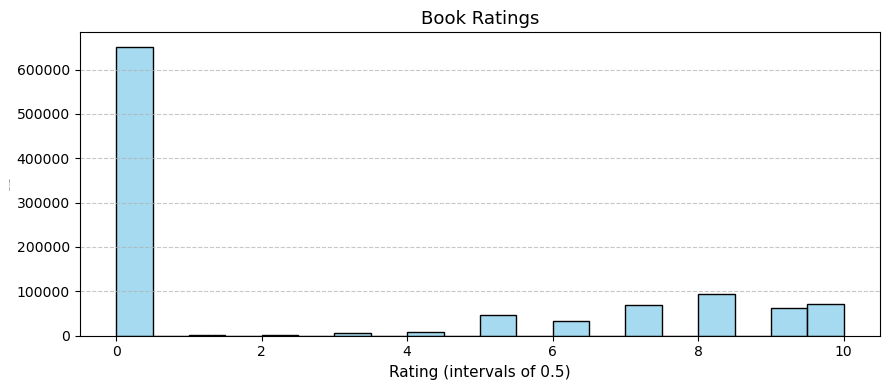

In [60]:
# Drop missing ratings
Ratings_df = Ratings_df.dropna(subset=['Book-Rating'])

# Plot
plt.figure(figsize=(9,4))
sns.histplot(Ratings_df['Book-Rating'], binwidth=0.5, color="skyblue", edgecolor="black")

plt.title("Book Ratings", fontsize=13)
plt.xlabel("Rating (intervals of 0.5)", fontsize=11)
plt.ylabel("Count of Ratings", fontsize=1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Recommendation System


# User Based Recommendation System

In [21]:
# 📚 Final Hybrid Recommendation System (User & Book Input) - Surprise-free, deployable
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import display, HTML

# Precompute user-item matrix
user_item_matrix = filtered_df.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)

# Compute item-item cosine similarity matrix
item_sim_matrix = pd.DataFrame(cosine_similarity(user_item_matrix.T), 
                               index=user_item_matrix.columns, 
                               columns=user_item_matrix.columns)

# Function to recommend for user
def recommend_for_user(user_id, n=5):
    if user_id not in user_item_matrix.index:
        return []
    user_ratings = user_item_matrix.loc[user_id]
    rated_books = user_ratings[user_ratings > 0].index.tolist()
    scores = {}

    for book in rated_books:
        similar_books = item_sim_matrix[book].drop(labels=rated_books, errors='ignore')
        for similar_book, sim in similar_books.items():
            if similar_book not in scores:
                scores[similar_book] = 0
            scores[similar_book] += sim

    # Sort by score then by average rating
    sorted_books = sorted(scores, key=lambda x: (
        scores[x], 
        filtered_df[filtered_df['ISBN'] == x]['Book-Rating'].mean()
    ), reverse=True)
    return sorted_books[:n]

# Function to recommend similar books for a given title
def recommend_for_book(title, n=5):
    matched = Books_df[Books_df['Book-Title'].str.lower() == title.lower()]
    if matched.empty:
        return []
    isbn = matched.iloc[0]['ISBN']
    if isbn not in item_sim_matrix:
        return []
    similar_scores = item_sim_matrix[isbn].drop(labels=[isbn])
    sorted_books = sorted(similar_scores.items(), key=lambda x: (
        x[1], 
        filtered_df[filtered_df['ISBN'] == x[0]]['Book-Rating'].mean()
    ), reverse=True)
    return [isbn for isbn, _ in sorted_books[:n]]

# Final hybrid function
def hybrid_recommend(user_id=None, book_title=None, n=5):
    if user_id and user_id in user_item_matrix.index:
        isbns = recommend_for_user(user_id, n)
        heading = f"📚 Top {n} Recommendations for User ID {user_id}"
    elif book_title:
        isbns = recommend_for_book(book_title, n)
        heading = f"📚 Top {n} Books Similar to '{book_title}'"
    else:
        # Fallback to top-rated books
        avg_ratings = filtered_df.groupby('ISBN')['Book-Rating'].mean()
        count_ratings = filtered_df['ISBN'].value_counts()
        top_isbns = avg_ratings[count_ratings >= 20].sort_values(ascending=False).head(n).index.tolist()
        isbns = top_isbns
        heading = "📚 Top Rated Books (Fallback)"

    if not isbns:
        print("⚠️ No recommendations found.")
        return

    html = f"<h2>{heading}</h2>"
    for isbn in isbns:
        book = Books_df[Books_df['ISBN'] == isbn]
        if book.empty:
            continue
        book = book.iloc[0]
        avg_rating = filtered_df[filtered_df['ISBN'] == isbn]['Book-Rating'].mean()
        html += f"""
        <div style="display: flex; align-items: center; margin-bottom: 20px;">
            <img src="{book['Image-URL-M']}" style="height: 150px; margin-right: 15px;">
            <div>
                <b>{book['Book-Title']}</b><br>
                Author: {book['Book-Author']}<br>
                Average Rating: {avg_rating:.2f}
            </div>
        </div>
        """
    display(HTML(html))



In [25]:
def hybrid_input():
    print("🔍 Recommend by:")
    print("1. User ID")
    print("2. Book Title")
    choice = input("Enter 1 or 2: ").strip()

    if choice == '1':
        try:
            uid = int(input("👤 Enter User ID: ").strip())
            if uid in user_item_matrix.index:
                hybrid_recommend(user_id=uid)
            else:
                print("⚠️ User ID not found. Showing fallback recommendations.")
                hybrid_recommend()
        except ValueError:
            print("❌ Invalid input. Showing fallback recommendations.")
            hybrid_recommend()

    elif choice == '2':
        title = input("📖 Enter Book Title: ").strip()
        if title:
            hybrid_recommend(book_title=title)
        else:
            print("⚠️ Empty title. Showing fallback recommendations.")
            hybrid_recommend()
    else:
        print("⚠️ Invalid choice. Showing fallback recommendations.")
        hybrid_recommend()


In [35]:
filtered_df['User-ID'].value_counts().head(10)


User-ID
11676     286
16795     102
95359      92
60244      75
104636     66
89602      57
6575       55
35859      53
153662     51
135149     51
Name: count, dtype: int64

In [39]:
popular_books = (
    filtered_df.groupby('ISBN')
    .filter(lambda x: len(x) >= 100)
    .groupby('ISBN')['Book-Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

Books_df[Books_df['ISBN'].isin(popular_books.index)][['Book-Title', 'Book-Author']]


,Book-Title,Book-Author
408,The Lovely Bones: A Novel,Alice Sebold
522,The Red Tent (Bestselling Backlist),Anita Diamant
748,The Da Vinci Code,Dan Brown
2143,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling
5506,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling


In [40]:
hybrid_input()

🔍 Recommend by:
1. User ID
2. Book Title


Enter 1 or 2:  2
📖 Enter Book Title:  The Da Vinci Code
